Epoch 1/20
58/58 [==============================] - 2s 13ms/step - loss: 0.0266 - val_loss: 0.0029
Epoch 2/20
58/58 [==============================] - 1s 9ms/step - loss: 7.9179e-04 - val_loss: 0.0020
Epoch 3/20
58/58 [==============================] - 1s 9ms/step - loss: 5.6429e-04 - val_loss: 0.0015
Epoch 4/20
58/58 [==============================] - 1s 9ms/step - loss: 4.6475e-04 - val_loss: 0.0013
Epoch 5/20
58/58 [==============================] - 0s 9ms/step - loss: 3.6327e-04 - val_loss: 0.0012
Epoch 6/20
58/58 [==============================] - 1s 9ms/step - loss: 3.1673e-04 - val_loss: 0.0011
Epoch 7/20
58/58 [==============================] - 0s 8ms/step - loss: 3.2829e-04 - val_loss: 0.0011
Epoch 8/20
58/58 [==============================] - 0s 8ms/step - loss: 2.8453e-04 - val_loss: 9.3511e-04
Epoch 9/20
58/58 [==============================] - 1s 9ms/step - loss: 2.6534e-04 - val_loss: 9.4130e-04
Epoch 10/20
58/58 [==============================] - 1s 9ms/step - loss: 2.87

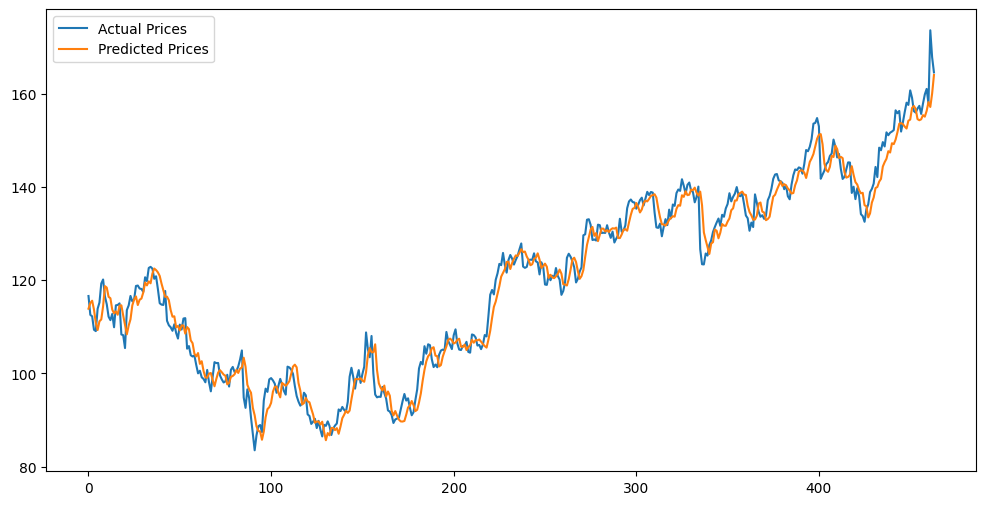

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
df = pd.read_csv('GOOG.csv')

# Use only the 'Close' price
data = df[['Close']].values

# Normalize the data to values between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create input sequences for RNN
def create_sequences(data, seq_length):
    """
    Turns the time series into overlapping sequences for RNN input.
    Each X is a sequence of `seq_length` values, and y is the next value.
    """
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define how many time steps to look back
seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

# Split into training and test sets (no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    SimpleRNN(50, activation='tanh'),
    Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
predicted_scaled = model.predict(X_test)

# Inverse transform predictions and actual values to get original price scale
predicted_prices = scaler.inverse_transform(predicted_scaled)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
# plt.title('Google Stock Price Prediction using Simple RNN')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
plt.legend()
# plt.show()
